# Regression test task from Huawei

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### №1 - Download and data analysis

In [2]:
data = pd.read_csv('2022_Test_ML.csv', sep=',')
data.head()

ind      s_mt      s_mq         d       h_p           QW           DP
0    0  1.409218  1.954108  2.867735  7.811623  1504.175621   501.563016
1    1  1.382565  2.006212  1.545090  8.124248  1240.530500   377.163158
2    2  1.622445  1.386172  1.192385  7.354709  1385.191155   457.404772
3    3  1.786172  1.591984  2.350701  4.324649  1602.841975  1429.795145
4    4  1.995591  2.024449  1.208417  6.993988  1326.290979   514.009143

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ind     500 non-null    int64  
 1   s_mt    500 non-null    float64
 2   s_mq    500 non-null    float64
 3   d       500 non-null    float64
 4   h_p     500 non-null    float64
 5   QW      500 non-null    float64
 6   DP      500 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 27.5 KB


#### After 'data.info()' we can see all data points don't include 'None' value

In [4]:
data.describe()

ind        s_mt        s_mq           d         h_p  \
count  500.000000  500.000000  500.000000  500.000000  500.000000   
mean   249.500000    1.750000    1.450000    2.000000    7.000000   
std    144.481833    0.550131    0.376406    0.579086    1.737257   
min      0.000000    0.800000    0.800000    1.000000    4.000000   
25%    124.750000    1.275000    1.125000    1.500000    5.500000   
50%    249.500000    1.750000    1.450000    2.000000    7.000000   
75%    374.250000    2.225000    1.775000    2.500000    8.500000   
max    499.000000    2.700000    2.100000    3.000000   10.000000   

                QW           DP  
count   500.000000   500.000000  
mean   1498.578955   668.927498  
std     163.293098   337.472251  
min    1067.505110   261.554292  
25%    1398.452956   410.931713  
50%    1506.174741   554.783459  
75%    1605.163589   845.136952  
max    1870.757813  1923.886333

In [5]:
headers = list(data)
headers

['ind', 's_mt', 's_mq', 'd', 'h_p', 'QW', 'DP']

#### Got features names

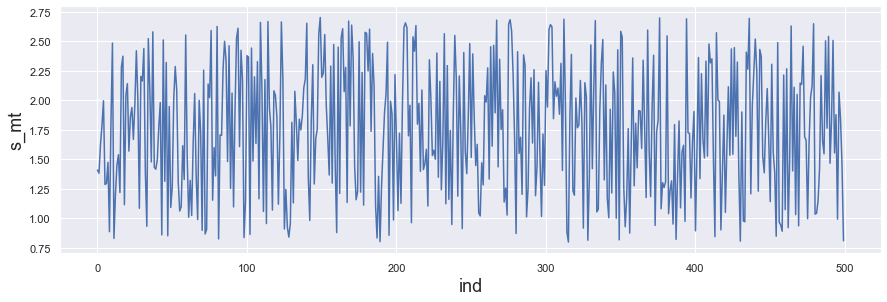

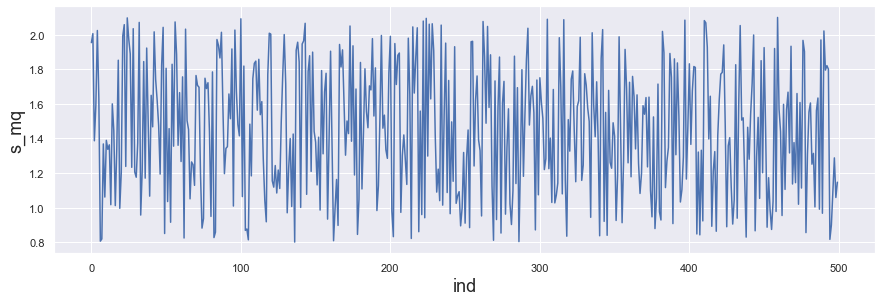

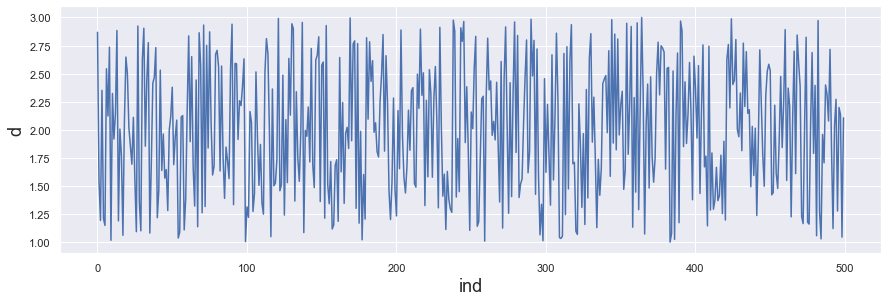

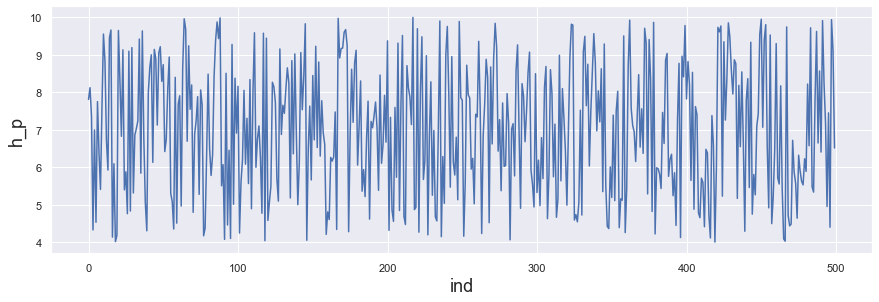

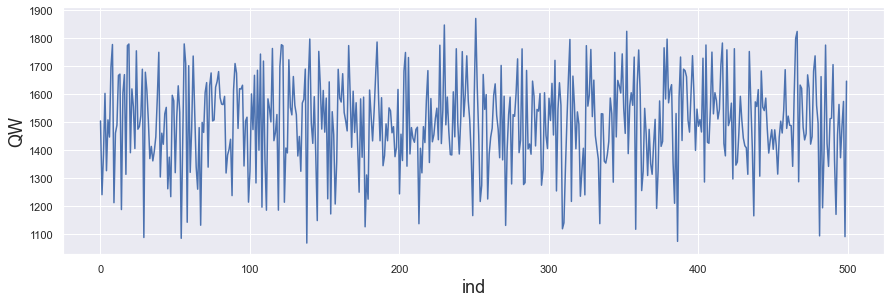

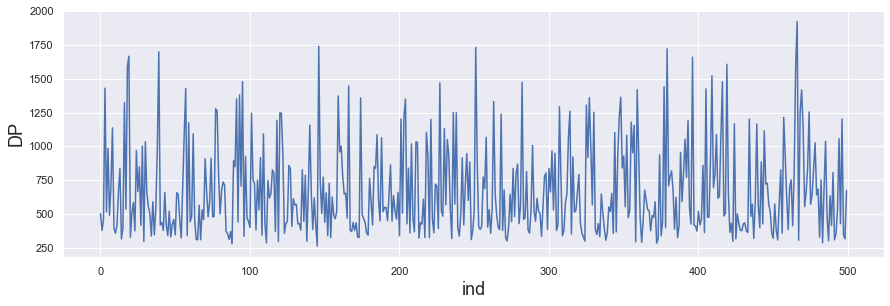

In [6]:
# Visualize data
for idx,itm in enumerate(headers[1:]):
    idx += 1
    if idx == 7: idx = 6
    plt.figure(figsize=(50, 10))
    plt.subplot(2, 3, idx)
    plt.plot(data['ind'], data[itm], '-')
    plt.xlabel('ind', fontsize=18)
    plt.ylabel(itm, fontsize=18)

#### Took a look for each features

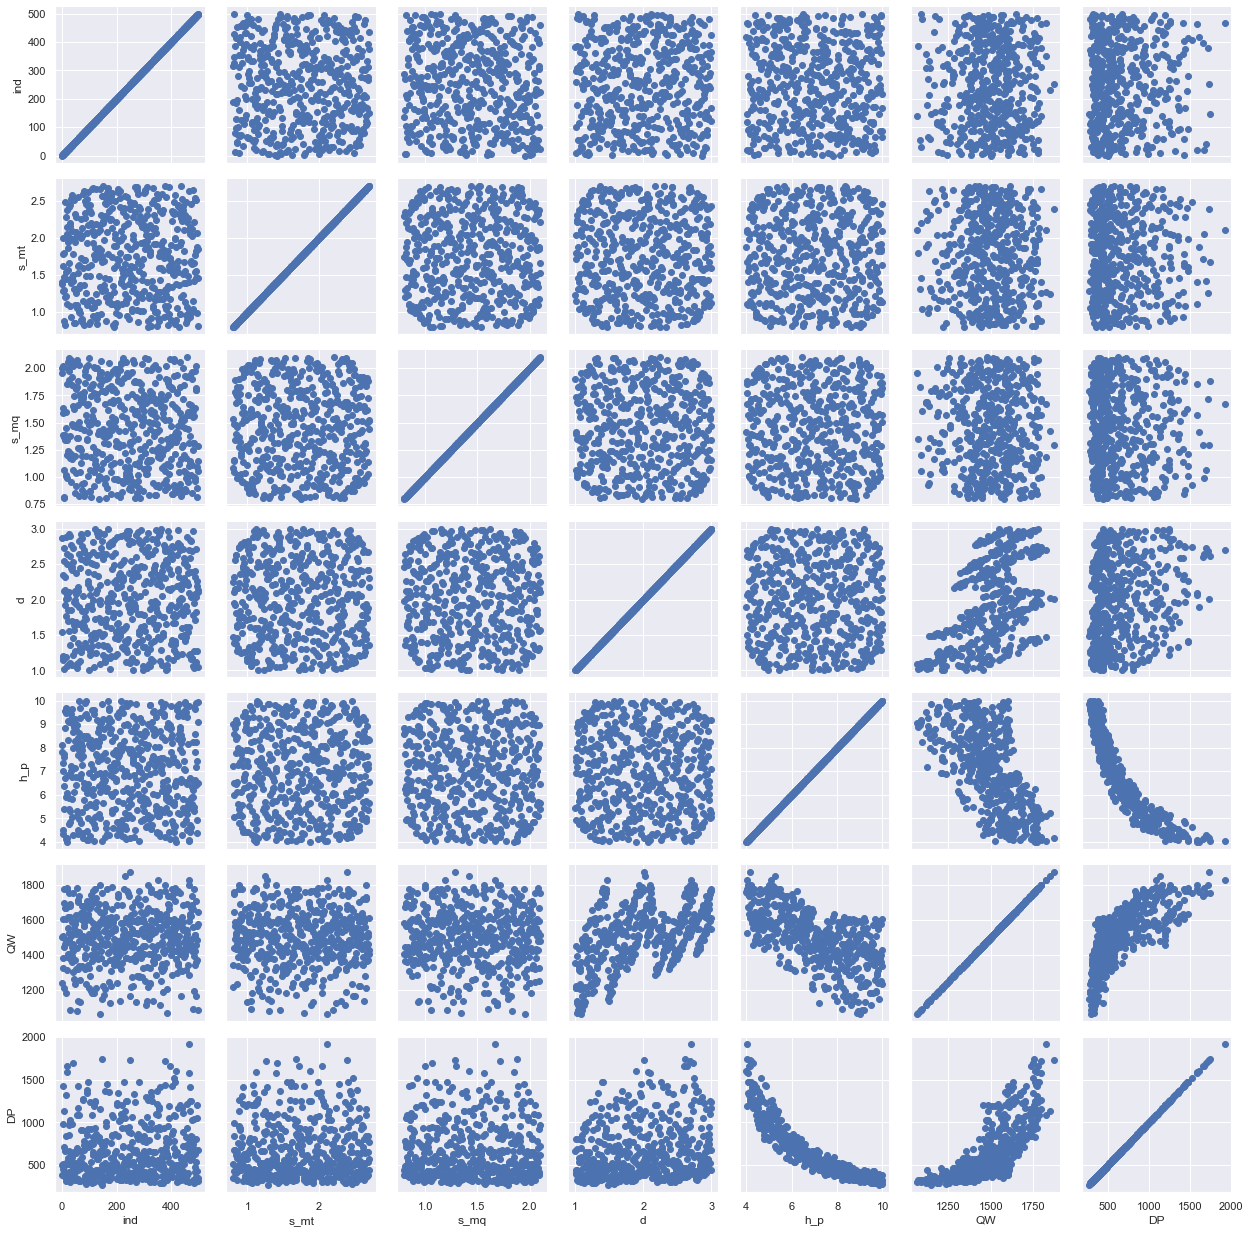

In [7]:
# Interaction of each features and targets
pair_frid_plot = sns.PairGrid(data)
pair_frid_plot.map(plt.scatter)

#### We can see hyperbolic dependency between h_p and DP, and some linear dependencies for (h_p, QW), (d, QW). Other variables have uncertain dependency 

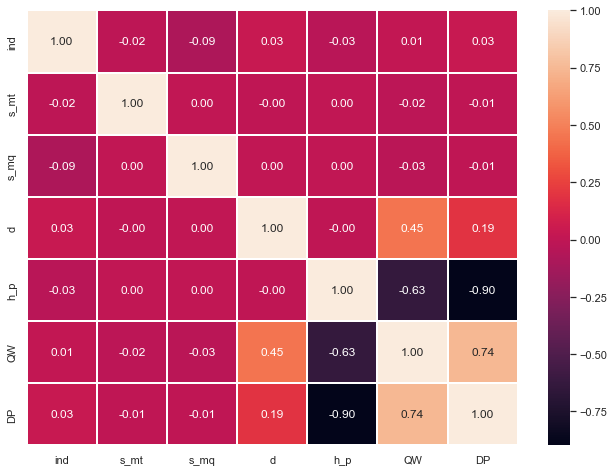

In [8]:
# Correlation matrix
corr = data.corr()
f, ax = plt.subplots(figsize=(11,8))
sns.heatmap(corr, annot=True, linewidths=1.5, fmt='.2f', ax=ax)
plt.show()

#### The most part of dependencies have close to zero Pierson's coefficient. That means there is no linear relations and we should consider other regression models

In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title = 'Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### №2 - Build regression model (Gradient Boosting)

In [12]:
#Splitting dataset
from sklearn.model_selection import train_test_split

X = np.array(data[['s_mt', 's_mq', 'd', 'h_p']])
Y = np.array(data[['QW', 'DP']])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=False)

print(f'Size of X train sample: {x_train.shape}')
print(f'Size of Y train sample: {y_train.shape}')
print(f'Size of X test sample: {x_test.shape}')
print(f'Size of Y test sample: {y_test.shape}')

# Initialize CatBoostRegressor
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=100,
                          learning_rate=0.1,
                          depth=None,
                          n_estimators = None,
                          l2_leaf_reg = None,
                          loss_function='MultiRMSE',
                          random_seed = 101,
                          metric_period = 1,
                          use_best_model = True,
                          od_type = 'Iter',
                          od_wait = 5,
                          task_type="CPU")

print('Model params: ', model.get_params())

Size of X train sample: (350, 4)
Size of Y train sample: (350, 2)
Size of X test sample: (150, 4)
Size of Y test sample: (150, 2)
Model params:  {'iterations': 100, 'learning_rate': 0.1, 'loss_function': 'MultiRMSE', 'od_wait': 5, 'od_type': 'Iter', 'random_seed': 101, 'use_best_model': True, 'metric_period': 1, 'task_type': 'CPU'}


In [13]:
# Fit model
model.fit(
    x_train, y_train,
    eval_set = (x_test, y_test),
    logging_level = None,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 344.1283051	test: 373.4012868	best: 373.4012868 (0)	total: 139ms	remaining: 13.8s
1:	learn: 322.7862544	test: 351.3009865	best: 351.3009865 (1)	total: 140ms	remaining: 6.87s
2:	learn: 300.4472505	test: 328.9271770	best: 328.9271770 (2)	total: 141ms	remaining: 4.57s
3:	learn: 282.0509796	test: 311.4415746	best: 311.4415746 (3)	total: 142ms	remaining: 3.42s
4:	learn: 264.4217040	test: 293.7826729	best: 293.7826729 (4)	total: 143ms	remaining: 2.73s
5:	learn: 248.8868531	test: 278.6270320	best: 278.6270320 (5)	total: 145ms	remaining: 2.26s
6:	learn: 233.7469417	test: 263.1538585	best: 263.1538585 (6)	total: 146ms	remaining: 1.94s
7:	learn: 220.0987672	test: 249.7275176	best: 249.7275176 (7)	total: 147ms	remaining: 1.69s
8:	learn: 206.1465257	test: 235.7895218	best: 235.7895218 (8)	total: 148ms	remaining: 1.49s
9:	learn: 196.9614907	test: 227.0173480	best: 227.0173480 (9)	total: 149ms	remaining: 1.34s
10:	learn: 187.0618556	test: 218.2291689	best: 218.2291689 (10)	total: 150ms	rem

In [14]:
from sklearn.metrics import r2_score

print(f'Train R^2 score: {round(r2_score(y_train, model.predict(x_train)), 3)}')
print(f'Test R^2 score: {round(r2_score(y_test, model.predict(x_test)), 3)}')

Train R^2 score: 0.975
Test R^2 score: 0.924


### №3 - Build relative errors for QW, DP output variables

Max relative error on train data for QW: 6.798 %
Max relative error on test data for QW: 11.428 %
Max relative error on train data for DP: 14.618 %
Max relative error on test data for DP: 18.75 %

Min relative error on train data for QW: 0.004 %
Min relative error on test data for QW: 0.001 %
Min relative error on train data for DP: 0.011 %
Min relative error on test data for DP: 0.009 %


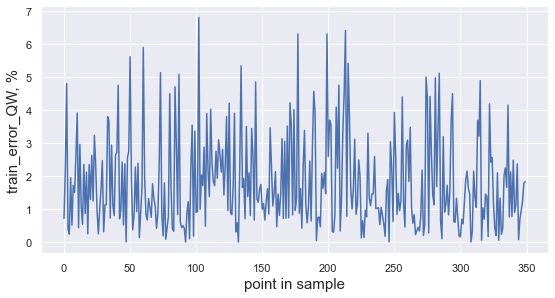

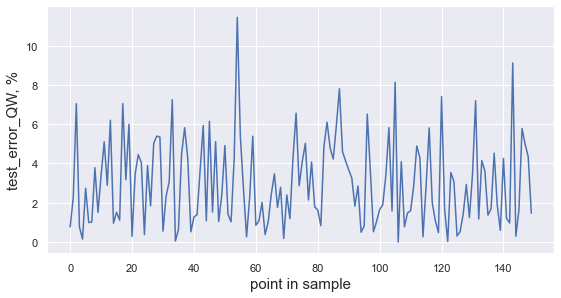

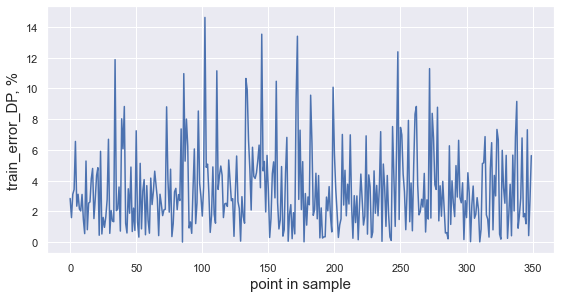

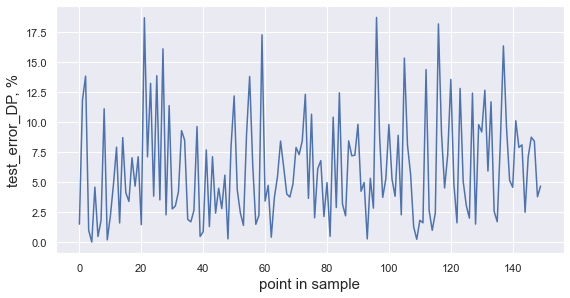

In [15]:
#3 Assessment model errors

error_train = abs(y_train - model.predict(x_train))*100 / abs(y_train)
error_test = abs(y_test - model.predict(x_test))*100 / abs(y_test)
    
error_box = {'train_error_QW': error_train[:,0],
          'test_error_QW': error_test[:,0],
          'train_error_DP': error_train[:,1],
          'test_error_DP': error_test[:,1]
         }

idx=0
for itm in error_box.items():
    idx += 1
    if idx == 5: idx = 4
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, idx)
    plt.plot(itm[1], '-')
    plt.xlabel('point in sample', fontsize=15)
    plt.ylabel(f'{itm[0]}, %', fontsize=15)
    
    
print(f'Max relative error on train data for QW: {round(max(error_train[:,0]),3)} %')
print(f'Max relative error on test data for QW: {round(max(error_test[:,0]),3)} %')
print(f'Max relative error on train data for DP: {round(max(error_train[:,1]),3)} %')
print(f'Max relative error on test data for DP: {round(max(error_test[:,1]),3)} %\n')

print(f'Min relative error on train data for QW: {round(min(error_train[:,0]),3)} %')
print(f'Min relative error on test data for QW: {round(min(error_test[:,0]),3)} %')
print(f'Min relative error on train data for DP: {round(min(error_train[:,1]),3)} %')
print(f'Min relative error on test data for DP: {round(min(error_test[:,1]),3)} %')

### №4 - Visualization of prediction and target variables

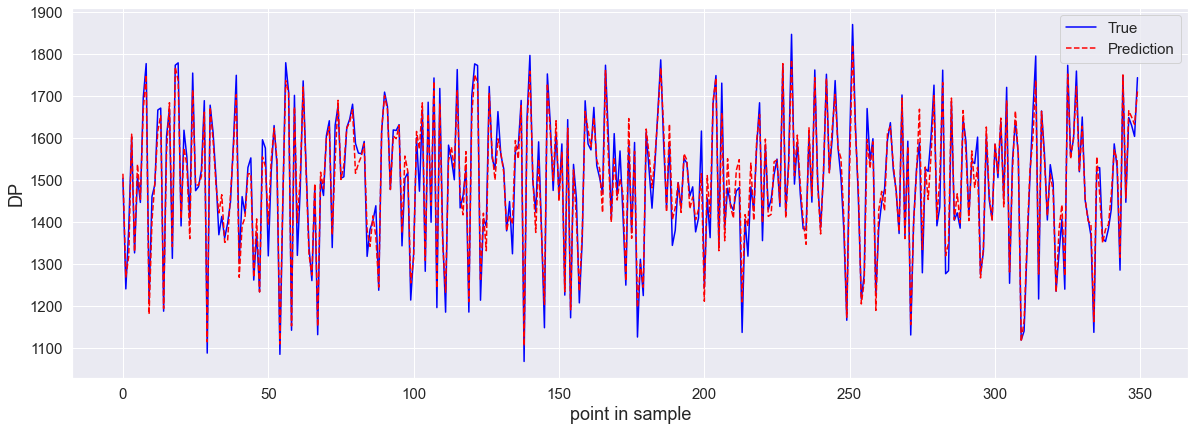

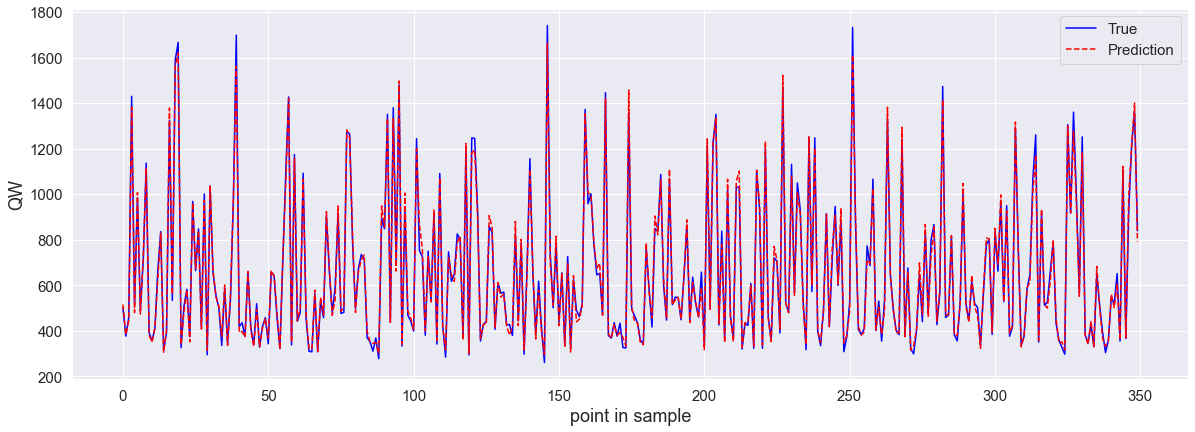

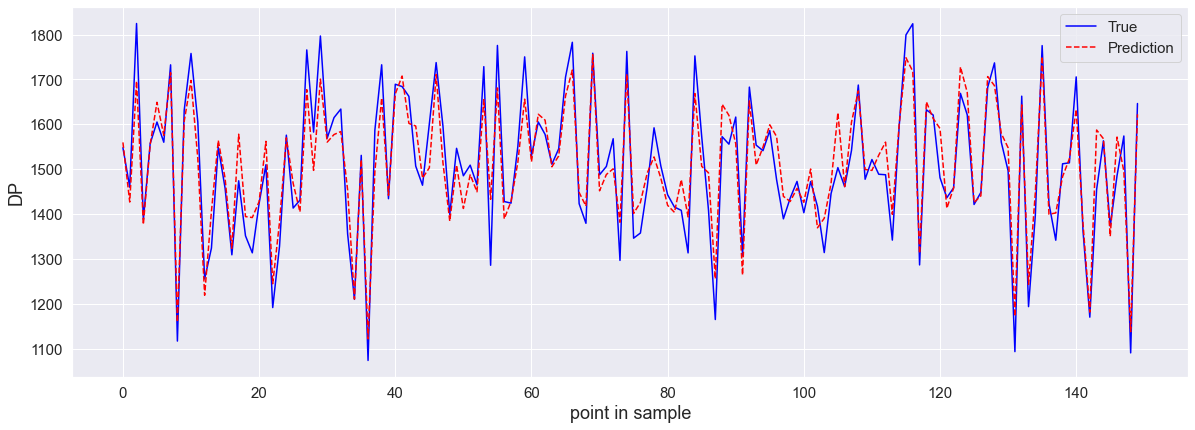

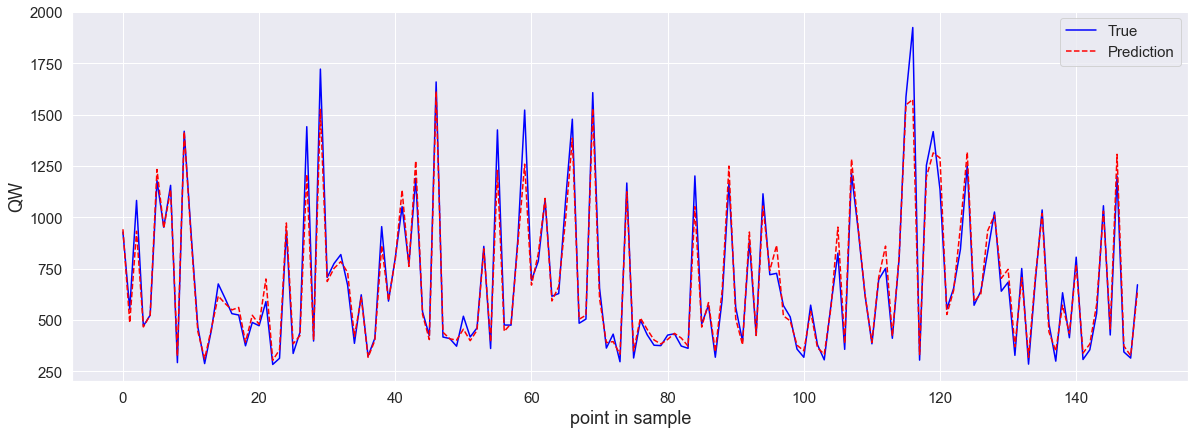

In [16]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)

def assess_value(true_, prediction):   
    for idx in range(1,3,1):
        plt.figure(figsize=(20, 15))
        plt.subplot(2, 1, idx)
        plt.plot(true_[:,idx-1], '-', color = 'blue', label='True')
        plt.plot(prediction[:,idx-1], '--', color = 'red', label='Prediction')
        plt.xlabel('point in sample', fontsize=18)
        plt.ylabel(headers[-idx], fontsize=18)
        plt.legend(fontsize=15)
        plt.show()
        
assess_value(y_train, model.predict(x_train))
assess_value(y_test, model.predict(x_test))